Name: Gautham Nagaraj Chandra Shekariah
UID: 30273439

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
energy_data = pd.read_csv('/content/Building_Energy_Benchmarking.csv')
energy_data.head()

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,26,1.5,1152308,506,6582,NaN,1152308.0,536.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,253,118.1,508594,4926,NaN,NaN,508594.0,236.0,2023,2023-21988603


In [4]:
energy_data.shape

(494, 31)

In [5]:
energy_data.isna().sum()

,0
Property Id,0
Property Name,0
Address 1,0
City,0
Postal Code,0
Province,0
Primary Property Type - Self Selected,0
Number of Buildings,0
Year Built,0
Property GFA - Self-Reported (m²),0


In [6]:
#Make a list from the dataset which includes missing values
#It would be simpler to simply iterate through all the columns and find percentage of missing values. Since we are working on a very small dataset the below step is feasible
columns_with_missing_values = ['ENERGY STAR Score', 'Weather Normalized Source Energy Use (GJ)', 'Natural Gas Use (GJ)', 'District Hot Water Use (GJ)', 'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
                               'Green Power - Onsite and Offsite (kWh)','Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)']
total_rows = energy_data.shape[0] - 1     #Get the total number of rows in the dataset excluding the first row.
for col in columns_with_missing_values:
  print((energy_data[col].isna().sum()/total_rows)*100)

66.73427991886409
0.4056795131845842
2.028397565922921
97.16024340770791
91.27789046653145
40.16227180527384
40.16227180527384


In [7]:
#There a total of 5 columns which have more than 40% missing values. We can drop these columns as filling them with categroical/numerical data will induce a bias in the dataset
energy_data.drop(['ENERGY STAR Score','District Hot Water Use (GJ)','Electricity Use – Generated from Onsite Renewable Systems (kWh)','Green Power - Onsite and Offsite (kWh)','Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)'],axis=1, inplace=True)
energy_data.head(10)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,0.97,1.04,1293,74.0,26,1.5,1152308,506,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,4.00,4.27,568,265.2,253,118.1,508594,4926,2023,2023-21988603
5,21988595,Apparatus Repair Shop and Spare Apparatus Shop,1725 18 AV NE,Calgary,T2N 2H8,Alberta,"Repair Services (Vehicle, Shoe, Locksmith, etc.)",2,2011,6632,...,1.16,1.24,554,83.5,179,26.9,604506,3480,2023,2023-21988595
6,10417704,Beltline Aquatic & Fitness Centre,221 12 Av SW,Calgary,T2R 0G9,Alberta,Fitness Center/Health Club/Gym,1,1988,1807,...,1.99,2.15,229,126.6,117,64.6,180718,2274,2023,2023-10417704
7,9481172,Bob Bohan Aquatic and Fitness Centre,4812 14 Av SE,Calgary,T2AoK9,Alberta,Heated Swimming Pool,1,1976,1641,...,6.22,6.53,674,410.7,304,185.0,597416,5914,2023,2023-9481172
8,10439156,Bowmont Civic Building,5000 Bowness Civic Building,Calgary,T3B 0B9,Alberta,Office,1,1974,832,...,1.09,1.21,63,75.7,24,28.8,62980,466,2023,2023-10439156
9,8854297,Calgary Public Building,205 8 AV SE,Calgary,T2G0K7,Alberta,Office,1,1931,15195,...,0.70,0.72,781,51.4,240,15.8,873097,4666,2023,2023-8854297


In [8]:
#Replace commas with '' so that the string data type can be converted to float
#The data type of the column is object, so we need to convert to a string first replace commas and then convert it to a float to find the median
energy_data['Weather Normalized Source Energy Use (GJ)'] = energy_data['Weather Normalized Source Energy Use (GJ)'].astype(str).str.replace(',','')
energy_data['Weather Normalized Source Energy Use (GJ)'] = energy_data['Weather Normalized Source Energy Use (GJ)'].fillna(energy_data['Weather Normalized Source Energy Use (GJ)'].astype(float).median())

In [9]:
#Use the same step above to replace values for Natural Gas Use column with the median
energy_data['Natural Gas Use (GJ)'] = energy_data['Natural Gas Use (GJ)'].astype(str).str.replace(',','')
energy_data['Natural Gas Use (GJ)'] = energy_data['Natural Gas Use (GJ)'].fillna(energy_data['Natural Gas Use (GJ)'].astype(float).median())

In [10]:
energy_data.isna().sum()

,0
Property Id,0
Property Name,0
Address 1,0
City,0
Postal Code,0
Province,0
Primary Property Type - Self Selected,0
Number of Buildings,0
Year Built,0
Property GFA - Self-Reported (m²),0


In [11]:
#Using regex to extract numeric data fromm text column ; Property GFA
import re
energy_data['Property GFA - Self-Reported (m²)']
#The data type of the column is object, meaning there is a mix of different data types

,Property GFA - Self-Reported (m²)
0,1838
1,7770
2,6681
3,17468
4,2143
...,...
489,768
490,1108
491,425
492,1108


In [12]:
#To extract the numerical data from these columns using regex we use:
#The \d includes only numeric values included in the column d+ matches one or more digits
#
energy_data['Property GFA - Self-Reported (m²)']= energy_data['Property GFA - Self-Reported (m²)'].str.extract(r"(\d+)", expand=False)
energy_data['Property GFA - Self-Reported (m²)']
#https://sparkbyexamples.com/python/python-extract-numbers-from-string/#:~:text=Extract%20numbers%20from%20a%20string%20Using%20re.&text=You%20can%20use%20the%20re,matches%20one%20or%20more%20digits.
#https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#extract-first-match-in-each-subject-extract

,Property GFA - Self-Reported (m²)
0,1838
1,7770
2,6681
3,17468
4,2143
...,...
489,768
490,1108
491,425
492,1108


In [13]:
postal_code_re = r'^[A-Z][0-9][A-Z][ ][0-9][A-Z][0-9]$'
#This regex pattern only allows postal codes to begin with capital letters from A-Z follwed by a digit, followed by capital letters from A-Z
#Followed by space and then capital letters, numers, capital letters again, ending with a number.
#Using the str.findall we can retrieve all postal codes with this format as the question requires.
#However the non valid postal codes are replaced with []

energy_data['Postal Code'] = energy_data['Postal Code'].str.findall(postal_code_re)
print(energy_data['Postal Code'])
#https://regex101.com/library/TqLf63?amp%3Bsearch=card&orderBy=HIGHEST_SCORE&page=1&search=&filterFlavors=javascript&filterFlavors=python

0      [T2H 0Z4]
1             []
2      [T2G 0W2]
3             []
4      [T2G 4M7]
         ...    
489    [T2G 1T7]
490    [T2C 2X1]
491    [T2N 3G8]
492    [T2W 4H7]
493    [T3A 5G1]
Name: Postal Code, Length: 494, dtype: object


In [14]:
#Used generative AI to get the code below:
def clean_property_name(name):
    # Remove special characters except spaces and alphanumeric characters
    cleaned_name = re.sub(r"[^a-zA-Z0-9 ]", "", name)
    # Remove extra spaces
    cleaned_name = re.sub(' +', ' ', cleaned_name)
    return cleaned_name.strip()  # Remove leading/trailing spaces

energy_data['Property Name'] = energy_data['Property Name'].apply(clean_property_name)

# --- Cleaning and Extracting from 'Address' ---

# Example: Extract street number and street name
def extract_address_info(address):
    # Match street number and street name (assumes a common format)
    match = re.search(r"(\d+)\s+([a-zA-Z0-9\s]+)", address)
    if match:
        street_number = match.group(1)
        street_name = match.group(2).strip()
        return pd.Series({'Street Number': street_number, 'Street Name': street_name})
    else:
        return pd.Series({'Street Number': None, 'Street Name': None})

address_info = energy_data['Address 1'].apply(extract_address_info)
energy_data = pd.concat([energy_data, address_info], axis=1)

In [15]:
energy_data.head()

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID,Street Number,Street Name
0,10176804,Acadia Aquatic Fitness Centre,9009 Fairmount Dr SE,Calgary,[T2H 0Z4],Alberta,Heated Swimming Pool,1,2010,1838,...,509,276.7,280,152.4,368616,5453,2023,2023-10176804,9009,Fairmount Dr SE
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,[],Alberta,Office,1,1981,7770,...,920,118.4,243,31.2,1091854,4725,2023,2023-6169481,2924,11 ST NE
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,[T2G 0W2],Alberta,Office,1,1974,6681,...,499,74.6,0,0.0,508589,3,2023,2023-6305956,315,10 AV SE
3,8854296,Andrew Davison,133 6 AV SE,Calgary,[],Alberta,Office,1,1979,17468,...,1293,74.0,26,1.5,1152308,506,2023,2023-8854296,133,6 AV SE
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,[T2G 4M7],Alberta,Office,1,2000,2143,...,568,265.2,253,118.1,508594,4926,2023,2023-21988603,2201,PORTLAND ST SE


In [16]:
#EDA and aggregration
#Let us examine which property averages the highest consumpition of natural gas
#There were some missing values generated when using error = 'coerce' which was replaced by the median of the col in the next step
energy_data['Natural Gas Use (GJ)'] = pd.to_numeric(energy_data['Natural Gas Use (GJ)'], errors = 'coerce').astype('float64')
energy_data['Natural Gas Use (GJ)'] = energy_data['Natural Gas Use (GJ)'].fillna(energy_data['Natural Gas Use (GJ)'].median())

#https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [17]:
energy_data.groupby(['Property Name','Year Ending'])['Natural Gas Use (GJ)'].mean()
#THe above code will display consumption of natural gas for property name for each year
#THis does not calculate the mean as the years are different and it displayes the individual values

Property Name                  Year Ending
Acadia Aquatic Fitness Centre  2019           6100.1
                               2020           3246.0
                               2021           2892.2
                               2022           3226.0
                               2023           5453.0
                                               ...  
Wildflower Arts Centre         2019           1196.8
                               2020           1019.6
                               2021            959.7
                               2022           1059.0
                               2023            961.0
Name: Natural Gas Use (GJ), Length: 494, dtype: float64

In [18]:
energy_data.groupby(['Property Name','Year Built'])['Natural Gas Use (GJ)'].mean()
#THe above code displays natural gas use vs property year built.
#IT was done to understand if properties which are newly built consume more natural gas as it a relative new form of energy
#However the below data does not satisfy our initial hypothesis that newly constructed property consume more natural gas

,,Natural Gas Use (GJ)
Property Name,Year Built,
Acadia Aquatic Fitness Centre,2010,4183.46
Ad Valorem,1981,6068.34
Alberta Trade Centre,1974,18.96
Andrew Davison,1979,636.56
Animal Services Centre,2000,5507.72
...,...,...
Thornhill Aquatic Recreation Centre,1971,9365.98
Village Square Leisure Centre,1900,74452.96
Water Centre,2008,6736.14


In [19]:
energy_data.groupby(['Property Name'])['Direct GHG Emissions Intensity (kgCO2e/m²)'].sum().sort_values(ascending = False)
#Here we are grouping the columns only using the property name  to get the sum of emissions throughout the years rather than single years
#It is displayed in reverse order to obtain the properties with most amount of emmision first
#Some of the properties managed to have 0 emmissions as well


,Direct GHG Emissions Intensity (kgCO2e/m²)
Property Name,
Village Square Leisure Centre,1462.2
Sir Winston Churchill Aquatic and Recreation Centre,1261.7
Glenmore Aquatic Centre,1221.2
Bob Bohan Aquatic and Fitness Centre,1068.4
Canyon Meadows Aquatic Fitness Centre,1026.0
...,...
Andrew Davison,9.3
Municipal Complex,3.5
Alberta Trade Centre,0.7


In [20]:
#Aggregations
#TO compute the average energy use intensity for each property we can use the same steps done above
energy_data.groupby(['Property Name'])['Site EUI (GJ/m²)'].mean().sort_values(ascending = False)
#We can display the Site EUI for each property is descending orderS

,Site EUI (GJ/m²)
Property Name,
Sir Winston Churchill Aquatic and Recreation Centre,6.388
Glenmore Aquatic Centre,6.090
Village Square Leisure Centre,6.062
Bob Bohan Aquatic and Fitness Centre,5.392
Canyon Meadows Aquatic Fitness Centre,5.070
...,...
Fire Headquarters,0.676
Alberta Trade Centre,0.664
Calgary Public Building,0.522


In [21]:
#to compute the total greehouse gas emmission per year
energy_data['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(energy_data['Total GHG Emissions (Metric Tons CO2e)'].str.replace(',','',regex=True)).astype('float64')
#The output had different values due to commas which were replaced by ''
energy_data.groupby(['Year Ending'])['Total GHG Emissions (Metric Tons CO2e)'].sum()

,Total GHG Emissions (Metric Tons CO2e)
Year Ending,
2019,75605.4
2020,66617.2
2021,68136.9
2022,72301.0
2023,75132.0


In [22]:
#Detecting outliers using regex and IQR
#Since we have already taken care of non numeric values in Total GHG Emissions (Metric Tons CO2e) column in the previous step
#We do not need to use regex rather can calculate the IQR directly
Q1 = energy_data['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
Q3 = energy_data['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)
median = energy_data['Total GHG Emissions (Metric Tons CO2e)'].median()
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR:.2f}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(median)
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Q1: 113.85
Q3: 696.55
IQR: 582.70
228.4
Lower Bound: -760.1999999999999
Upper Bound: 1570.6


In [23]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
min_range = energy_data['Total GHG Emissions (Metric Tons CO2e)'].min()
max_range = energy_data['Total GHG Emissions (Metric Tons CO2e)'].max()
print(f"Minimum value of the column: {min_range}")
print(f"Minimum value of the column: {max_range}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

#We use the minimum of the coulmn here instead of lower bound as it gives a negative value
#https://math.stackexchange.com/questions/1752970/using-negative-values-for-a-box-plot-box-whisker

Minimum value of the column: 15.0
Minimum value of the column: 13067.0
Lower Bound: -760.1999999999999
Upper Bound: 1570.6


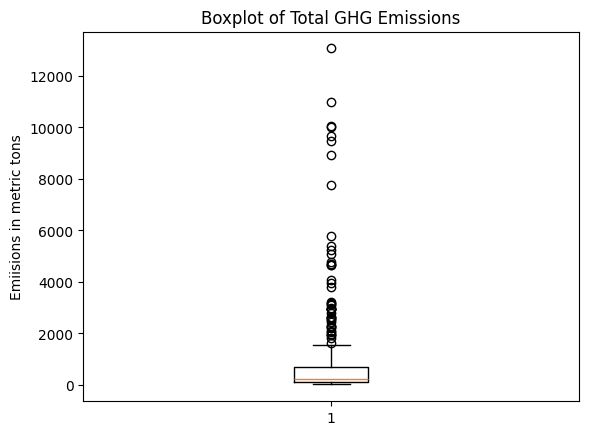

In [24]:
plt.boxplot(energy_data['Total GHG Emissions (Metric Tons CO2e)'])
plt.title('Boxplot of Total GHG Emissions')
plt.ylabel('Emiisions in metric tons')
plt.show()

In [25]:
#We can see that there are many outliers for this column
#The lower bound of the boxplot is a negative value, which is not possible since the emission of a property cannot be negative
outliers = energy_data[(energy_data['Total GHG Emissions (Metric Tons CO2e)'] < min_range) | (energy_data['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)]
print(f"Number of outliers in Total GHG Emissions (Metric Tons CO2e): {outliers.shape[0]}")

Number of outliers in Total GHG Emissions (Metric Tons CO2e): 46


In [26]:
#Removing outliers
#Replacing outliers using the median calculate the above cells
energy_data['Total GHG Emissions (Metric Tons CO2e)'].mask(energy_data['Total GHG Emissions (Metric Tons CO2e)'] <= min_range,median, inplace=True)
energy_data['Total GHG Emissions (Metric Tons CO2e)'].mask(energy_data['Total GHG Emissions (Metric Tons CO2e)'] >= upper_bound,median, inplace=True)

#Those 46 outliers have been removed from the dataset
#https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

<ipython-input-26-3ab4856f1ca2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_data['Total GHG Emissions (Metric Tons CO2e)'].mask(energy_data['Total GHG Emissions (Metric Tons CO2e)'] <= min_range,median, inplace=True)
<ipython-input-26-3ab4856f1ca2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

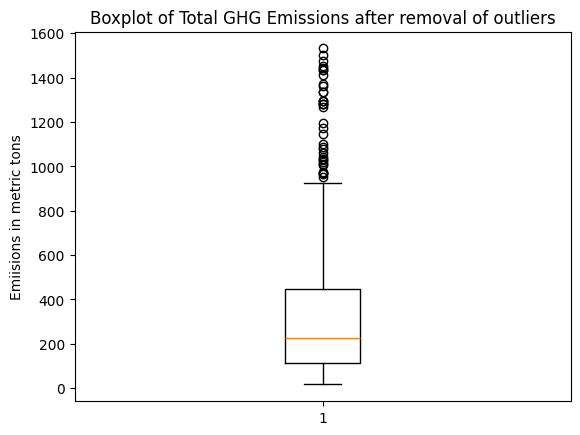

In [27]:

plt.boxplot(energy_data['Total GHG Emissions (Metric Tons CO2e)'])
plt.title('Boxplot of Total GHG Emissions after removal of outliers')
plt.ylabel('Emiisions in metric tons')
plt.show()

In [28]:
#Though a lot of outliers have been removed the 'non-extreme' outliers still remain
#We can elimante these if we shorten our upper_range to max() of the coumn. It would remove all outliers
print(energy_data['Total GHG Emissions (Metric Tons CO2e)'].describe().round(2))


count     494.00
mean      340.81
std       333.64
min        16.80
25%       114.00
50%       228.40
75%       447.90
max      1531.40
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64


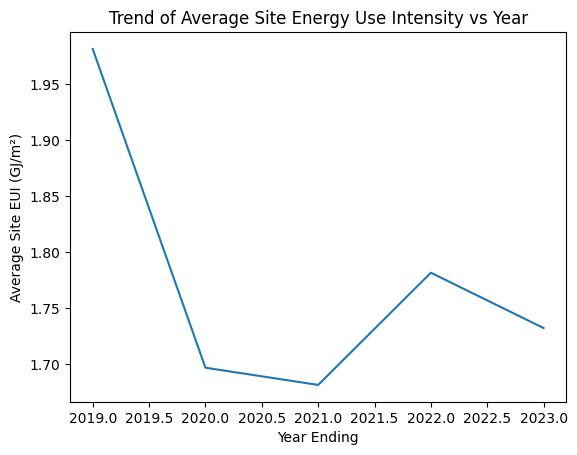

In [29]:
#Data Visualization
#We use the groupby function to group the year and site EUI. Once grouped we can use the mean() to get the average

average_site_eui_by_year = energy_data.groupby('Year Ending')['Site EUI (GJ/m²)'].mean()
plt.plot(average_site_eui_by_year.index, average_site_eui_by_year.values)
plt.xlabel('Year Ending')
plt.ylabel('Average Site EUI (GJ/m²)')
plt.title('Trend of Average Site Energy Use Intensity vs Year')
plt.show()

In [30]:
#There is an overall decrease in the amount of Site energy use intensity compared to 2019 and 2023
#This could be due to number of factors, maybe the machines are more energy efficient
#There is a significant decrease in 2020 to 2021 probably due to the lock-down though it increases again it does not go pack to its peak value in 2019

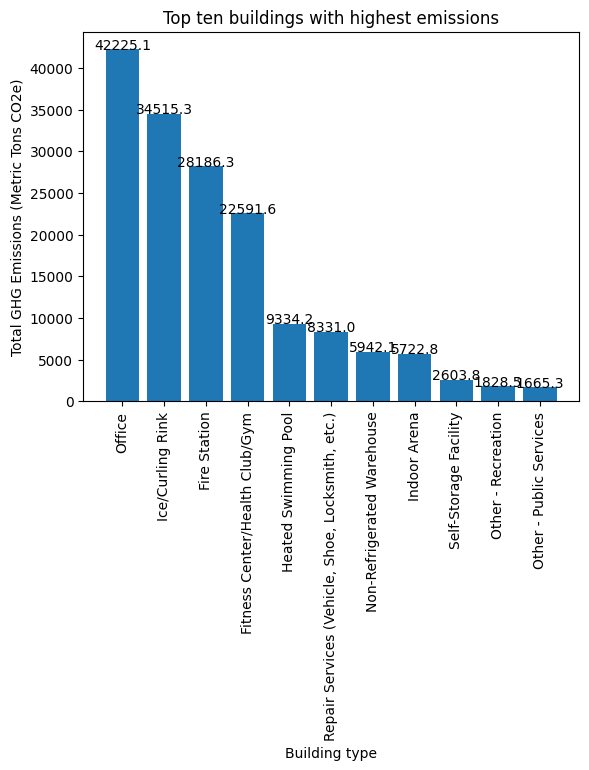

In [48]:
#Highest GHG emissions by building
highest_building_GHG_by_year = energy_data.groupby('Primary Property Type - Self Selected')['Total GHG Emissions (Metric Tons CO2e)'].sum()
top_ten = highest_building_GHG_by_year.sort_values(ascending=False)[0:11]
plt.bar(top_ten.index, top_ten.values)
plt.xlabel('Building type')
#https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels
plt.xticks(rotation=90)
plt.ylabel('Total GHG Emissions (Metric Tons CO2e)')
plt.title('Top ten buildings with highest emissions')
for i,v in enumerate(top_ten.values):
  plt.text(top_ten.index[i], v, str(v), ha='center')
plt.show()

#https://www.geeksforgeeks.org/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib/

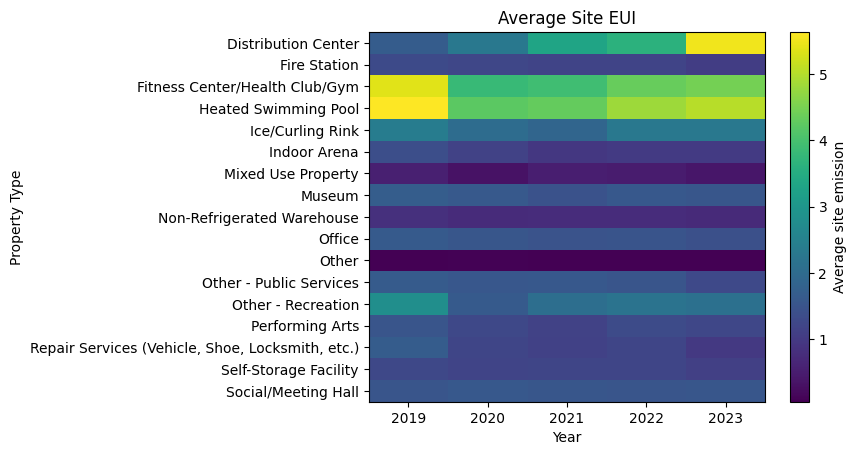

In [52]:
#Heatmap for site EUI for different property types
data = pd.pivot_table(energy_data, values='Site EUI (GJ/m²)', index='Primary Property Type - Self Selected', columns='Year Ending', aggfunc='mean')
plt.imshow(data ,cmap = 'viridis',aspect='auto')
plt.colorbar(label='Average site emission')
plt.title('Average Site EUI')
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.index)), data.index)
plt.xlabel('Year')
plt.ylabel('Property Type')
plt.show()

#https://stackoverflow.com/questions/51146970/heatmap-do-not-display-row-and-column-names

In [56]:
energy_data['Site Energy Use (GJ)'] = pd.to_numeric(energy_data['Site Energy Use (GJ)'].str.replace(',', '', regex=True), errors='coerce')
#Some values have commas need to replace them and convert them to flaoting type
#grouping the data and calling the corr function will display the correlation between the 3 variables
corr_data = energy_data.groupby('Primary Property Type - Self Selected')[[('Site Energy Use (GJ)'),'Total GHG Emissions (Metric Tons CO2e)']].corr()
print(corr_data)

                                                                                         Site Energy Use (GJ)  \
Primary Property Type - Self Selected                                                                           
Distribution Center                              Site Energy Use (GJ)                                1.000000   
                                                 Total GHG Emissions (Metric Tons CO2e)                   NaN   
Fire Station                                     Site Energy Use (GJ)                                1.000000   
                                                 Total GHG Emissions (Metric Tons CO2e)              0.983481   
Fitness Center/Health Club/Gym                   Site Energy Use (GJ)                                1.000000   
                                                 Total GHG Emissions (Metric Tons CO2e)             -0.595456   
Heated Swimming Pool                             Site Energy Use (GJ)                           

In [ ]:
#A strong linear correlation exists for those variables which have a correlation of 1 or -1
#If we refer to the boxplot previously plotted we can see that office has a correlation of 1 vs emissions
#THe bigger the building or more number of building a property type has the stronger correlation is associated with emissions
#Greater number of building/building size higher the consumption and higher the emmission +1
#The inverse can be said about property type having smaller buildings or less number of buildings
#They have a negative correlation with emissions and consumptions

In [63]:
#To conduct hypothesis testing between two types of buildings

import scipy.stats as stats


#since there are no residential building we can consider the one with lowest emission; let us consider recreational building
#The energy star score column was dropped due to high number of missing values

office_data = energy_data[energy_data['Primary Property Type - Self Selected'] == 'Office']
recreation_data = energy_data[energy_data['Primary Property Type - Self Selected'] == 'Other - Recreation']

t_statistic, p_value = stats.ttest_rel(office_data['Total GHG Emissions (Metric Tons CO2e)'][:10], recreation_data['Total GHG Emissions (Metric Tons CO2e)'])

alpha = 0.05
df = len(energy_data['Primary Property Type - Self Selected']=='Other - Recreation')-1

critical_t = stats.t.ppf(1 - alpha/2, df)

print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)

print('With T-value')
if np.abs(t_statistic) >critical_t:
    print('There is significant difference between office and recreational centres')
else:
    print('No significant difference found between office and recreational centres')

print('With P-value')
if p_value >alpha:
    print('No evidence to reject the null hypothesis that significant difference between emissions from office and recreational centres')
else:
    print('Evidence found to reject the null hypothesis that significant difference between emissions from office and recreational centres')

T-value: 3.000549957433117
P-Value: 0.01494303235351889
Critical t-value: 1.9647875279653393
With T-value
There is significant difference between office and recreational centres
With P-value
Evidence found to reject the null hypothesis that significant difference between emissions from office and recreational centres


In [ ]:
#THe null hypothesis is the consideration that both these buildings have the same amount of emission output
#The alternate hypothesis is to disprove the model and state there is difference in emission of these 2 buildings
#The t-test is used when information is unkown about the population i.e mean and standard deviation unknown
#From the above test we can conclude that there is a signifcant difference between emission from an office and a recreational centre
